# Data Cleansing

We will be using Spark to do some exploratory data analysis & cleansing of the SF Airbnb rental dataset from <a href="http://insideairbnb.com/get-the-data.html" target="_blank">Inside Airbnb</a>.

<img src="https://files.training.databricks.com/images/301/sf.jpg" style="height: 200px; margin: 10px; border: 1px solid #ddd; padding: 10px"/>

## In this lesson you:
 - Impute missing values
 - Identify & remove outliers

In [261]:
# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyspark as spark
from pyspark.sql.functions import col, translate

Output_path = 'C:/Users/Thierno Barry/Documents/Machine Learning/00.data/output/'
Iutput_path = 'C:/Users/Thierno Barry/Documents/Machine Learning/00.data/input/'

In [262]:
# Let's load the Airbnb dataset in
#file_path = 'C:/Users/Thierno Barry/Documents/Machine Learning/00.data/input/listings.csv.gz'
file_path = Iutput_path+"sf-listings-2019-03-06.csv"

#sf_listings = pd.read_csv(file_path, compression='gzip')
sf_listings =pd.read_csv(file_path)

In [263]:
# aperçu du dataset
display(sf_listings)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20190306152813,2019-03-06,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,...,t,f,moderate,f,f,1,1,0,0,1.54
1,5858,https://www.airbnb.com/rooms/5858,20190306152813,2019-03-06,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.93
2,7918,https://www.airbnb.com/rooms/7918,20190306152813,2019-03-06,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.15
3,8142,https://www.airbnb.com/rooms/8142,20190306152813,2019-03-06,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...,Nice and good public transportation. 7 minute...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.15
4,8339,https://www.airbnb.com/rooms/8339,20190306152813,2019-03-06,Historic Alamo Square Victorian,Pls email before booking. Interior featured i...,Please send us a quick message before booking ...,Pls email before booking. Interior featured i...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7146,32838150,https://www.airbnb.com/rooms/32838150,20190306152813,2019-03-06,Noe Valley Place,Our Noe Valley Place is a tasteful small apar...,Our Noe Valley Place is a pleasant and tastefu...,Our Noe Valley Place is a tasteful small apar...,none,NaN,...,t,f,flexible,f,f,16,16,0,0,NaN
7147,32839217,https://www.airbnb.com/rooms/32839217,20190306152813,2019-03-06,Unique MicroStudio-Stone's Throw to Fshrmn's W...,This micro studio is in a class of its own. O...,NaN,This micro studio is in a class of its own. O...,none,"It doesn't get any better: Fisherman's Wharf,...",...,t,f,flexible,f,f,8,8,0,0,NaN
7148,32841126,https://www.airbnb.com/rooms/32841126,20190306152813,2019-03-06,"Cozy, Elegant 1BD Triplex in THE BEST NEIGHBOR...","This airy, light-filled 1-bedroom apt. is loca...",The apartment is on the second floor of a beau...,"This airy, light-filled 1-bedroom apt. is loca...",none,This is widely known as one of San Francisco's...,...,t,f,flexible,f,f,8,8,0,0,NaN
7149,32842243,https://www.airbnb.com/rooms/32842243,20190306152813,2019-03-06,Spacious/Bright Downtown 1x1 w/ Views!,Remodeled apartment close to downtown with all...,Private apartment in our building close to dow...,Remodeled apartment close to downtown with all...,none,Nitty-Gritty neighborhood on the edge of the T...,...,t,f,flexible,f,f,87,86,1,0,NaN


In [264]:
# lister les colonnes
sf_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

For the sake of simplicity, only keep certain columns from this dataset. We will talk about feature selection later.

In [265]:
columns_to_keep = [
    "host_is_superhost",
    "cancellation_policy",
    "instant_bookable",
    "host_total_listings_count",
    "neighbourhood_cleansed",
    "latitude",
    "longitude",
    "property_type",
    "room_type",
    "accommodates",
    "bathrooms",
    "bedrooms",
    "beds",
    "bed_type",
    "minimum_nights",
    "number_of_reviews",
    "review_scores_rating",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value",
    "price"
]
base_df = sf_listings[columns_to_keep]
base_df.count()

host_is_superhost              7151
cancellation_policy            7151
instant_bookable               7151
host_total_listings_count      7151
neighbourhood_cleansed         7151
latitude                       7151
longitude                      7151
property_type                  7151
room_type                      7151
accommodates                   7151
bathrooms                      7130
bedrooms                       7149
beds                           7144
bed_type                       7151
minimum_nights                 7151
number_of_reviews              7151
review_scores_rating           5730
review_scores_accuracy         5726
review_scores_cleanliness      5727
review_scores_checkin          5724
review_scores_communication    5728
review_scores_location         5724
review_scores_value            5723
price                          7151
dtype: int64

In [266]:
base_df.dtypes

host_is_superhost               object
cancellation_policy             object
instant_bookable                object
host_total_listings_count        int64
neighbourhood_cleansed          object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
minimum_nights                   int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
price                           object
dtype: object

### Fixing Data Types

Take a look at the schema above. You'll notice that the **`price`** field got picked up as string. For our task, we need it to be a numeric (double type) field. 

Let's fix that.

In [267]:
fixed_price_df = base_df.copy()
fixed_price_df["price"] = fixed_price_df["price"].str.replace(',', '').str.replace('$', '').astype(float)

C:\Users\THIERN~1\AppData\Local\Temp/ipykernel_132132/2235389702.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  fixed_price_df["price"] = fixed_price_df["price"].str.replace(',', '').str.replace('$', '').astype(float)


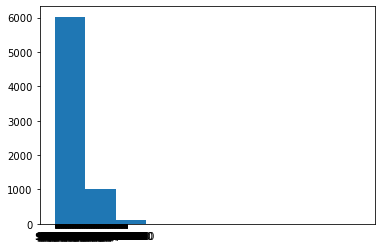

In [268]:
fig, ax = plt.subplots()
ax.hist(base_df['price'], range=(0,2000))
plt.show()

### Summary statistics

Two options:
* **`describe`**: count, mean, stddev, min, max
* **`summary`**: describe + interquartile range (IQR)

In [269]:
display(fixed_price_df.describe())

,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
count,7151.000000,7151.000000,7151.000000,7151.000000,7130.000000,7149.000000,7144.000000,7.151000e+03,7151.000000,5730.000000,5726.000000,5727.000000,5724.000000,5728.000000,5724.000000,5723.000000,7151.000000
mean,52.569571,37.765809,-122.430526,3.200951,1.328962,1.342565,1.764838,1.400030e+04,43.529157,95.546946,9.775585,9.624935,9.870021,9.841306,9.649371,9.405731,213.654034
std,177.371652,0.022527,0.026792,1.914692,0.794556,0.932685,1.176853,1.182542e+06,72.519229,6.935152,0.665117,0.768344,0.497995,0.579425,0.719816,0.796915,313.282220
min,0.000000,37.707430,-122.513060,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
25%,1.000000,37.751125,-122.442950,2.000000,1.000000,1.000000,1.000000,2.000000e+00,1.000000,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,100.000000
50%,2.000000,37.767550,-122.425470,2.000000,1.000000,1.000000,1.000000,4.000000e+00,11.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,150.000000
75%,8.000000,37.784615,-122.411070,4.000000,1.500000,2.000000,2.000000,3.000000e+01,54.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,235.000000
max,1199.000000,37.810310,-122.369790,16.000000,14.000000,14.000000,14.000000,1.000000e+08,677.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10000.000000


In [270]:
# Calculer des statistiques sommaires pour le DataFrame fixe
summary = {
    'count': fixed_price_df.count(),
    'mean': fixed_price_df.mean(),
    'std': fixed_price_df.std(),
    'min': fixed_price_df.min(),
    '25%': fixed_price_df.quantile(0.25),
    '50%': fixed_price_df.quantile(0.5),
    '75%': fixed_price_df.quantile(0.75),
    'max': fixed_price_df.max()
}

display(pd.DataFrame(summary))

C:\Users\THIERN~1\AppData\Local\Temp/ipykernel_132132/59878732.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'mean': fixed_price_df.mean(),
C:\Users\THIERN~1\AppData\Local\Temp/ipykernel_132132/59878732.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'std': fixed_price_df.std(),


,count,mean,std,min,25%,50%,75%,max
accommodates,7151,3.200951,1.914692e+00,1,2.000000,2.00000,4.000000,16
bathrooms,7130,1.328962,7.945555e-01,0.0,1.000000,1.00000,1.500000,14.0
bed_type,7151,NaN,NaN,Airbed,NaN,NaN,NaN,Real Bed
bedrooms,7149,1.342565,9.326852e-01,0.0,1.000000,1.00000,2.000000,14.0
beds,7144,1.764838,1.176853e+00,0.0,1.000000,1.00000,2.000000,14.0
cancellation_policy,7151,NaN,NaN,flexible,NaN,NaN,NaN,super_strict_60
host_is_superhost,7151,NaN,NaN,f,NaN,NaN,NaN,t
host_total_listings_count,7151,52.569571,1.773717e+02,0,1.000000,2.00000,8.000000,1199
instant_bookable,7151,NaN,NaN,f,NaN,NaN,NaN,t
latitude,7151,37.765809,2.252719e-02,37.70743,37.751125,37.76755,37.784615,37.81031


In [271]:
def summarize_dataframe(df):
    # Calculer des statistiques sommaires pour le DataFrame
    summary = {
        #'column': df.index,
        'count': df.count(),
        'missing': (df.isna().mean() * 100).apply(lambda x: '{:.0f}%'.format(x)),
        'unique': df.nunique(),
        'mean': df.mean(),
        'std': df.std(),
        'min': df.min(),
        '25%': df.quantile(0.25),
        '50%': df.quantile(0.5),
        '75%': df.quantile(0.75),
        'max': df.max(),
        'custom': df.dtypes
    }

    return summary

summary = summarize_dataframe(fixed_price_df)
display(pd.DataFrame(summary))

C:\Users\THIERN~1\AppData\Local\Temp/ipykernel_132132/401174246.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'mean': df.mean(),
C:\Users\THIERN~1\AppData\Local\Temp/ipykernel_132132/401174246.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'std': df.std(),


,count,missing,unique,mean,std,min,25%,50%,75%,max,custom
accommodates,7151,0%,16,3.200951,1.914692e+00,1,2.000000,2.00000,4.000000,16,int64
bathrooms,7130,0%,16,1.328962,7.945555e-01,0.0,1.000000,1.00000,1.500000,14.0,float64
bed_type,7151,0%,5,NaN,NaN,Airbed,NaN,NaN,NaN,Real Bed,object
bedrooms,7149,0%,9,1.342565,9.326852e-01,0.0,1.000000,1.00000,2.000000,14.0,float64
beds,7144,0%,14,1.764838,1.176853e+00,0.0,1.000000,1.00000,2.000000,14.0,float64
cancellation_policy,7151,0%,6,NaN,NaN,flexible,NaN,NaN,NaN,super_strict_60,object
host_is_superhost,7151,0%,2,NaN,NaN,f,NaN,NaN,NaN,t,object
host_total_listings_count,7151,0%,66,52.569571,1.773717e+02,0,1.000000,2.00000,8.000000,1199,int64
instant_bookable,7151,0%,2,NaN,NaN,f,NaN,NaN,NaN,t,object
latitude,7151,0%,4684,37.765809,2.252719e-02,37.70743,37.751125,37.76755,37.784615,37.81031,float64


In [272]:
#display(fixed_price_df.columns)
#display(len(fixed_price_df.columns))
counts_list = []
index_list = []
for col in fixed_price_df.columns:
    if fixed_price_df[col].count() != 0:
        index_list.append(col)
        counts_list.append([col, fixed_price_df[col].value_counts().idxmax(),
                            fixed_price_df[col].value_counts().max()])
    
    
    
ar = np.array(counts_list)
df = pd.DataFrame(ar, index = [index_list], columns = ['column', 'top', 'freq top'])
display(df)

,column,top,freq top
host_is_superhost,host_is_superhost,f,4219
cancellation_policy,cancellation_policy,strict_14_with_grace_period,3088
instant_bookable,instant_bookable,f,4434
host_total_listings_count,host_total_listings_count,1,2653
neighbourhood_cleansed,neighbourhood_cleansed,Mission,692
latitude,latitude,37.77981,6
longitude,longitude,-122.43386,6
property_type,property_type,Apartment,3013
room_type,room_type,Entire home/apt,4366
accommodates,accommodates,2,3211


In [273]:
df1 = pd.DataFrame(summary)
df1["column"] = list(df1.index)

df2 = df.copy()

left_join_df = pd.merge(df1, df2, on='column', how='left')
left_join_df = left_join_df.set_index('column')
display(left_join_df)

,count,missing,unique,mean,std,min,25%,50%,75%,max,custom,top,freq top
column,,,,,,,,,,,,,
accommodates,7151,0%,16,3.200951,1.914692e+00,1,2.000000,2.00000,4.000000,16,int64,2,3211
bathrooms,7130,0%,16,1.328962,7.945555e-01,0.0,1.000000,1.00000,1.500000,14.0,float64,1.0,5128
bed_type,7151,0%,5,NaN,NaN,Airbed,NaN,NaN,NaN,Real Bed,object,Real Bed,7078
bedrooms,7149,0%,9,1.342565,9.326852e-01,0.0,1.000000,1.00000,2.000000,14.0,float64,1.0,4202
beds,7144,0%,14,1.764838,1.176853e+00,0.0,1.000000,1.00000,2.000000,14.0,float64,1.0,3893
cancellation_policy,7151,0%,6,NaN,NaN,flexible,NaN,NaN,NaN,super_strict_60,object,strict_14_with_grace_period,3088
host_is_superhost,7151,0%,2,NaN,NaN,f,NaN,NaN,NaN,t,object,f,4219
host_total_listings_count,7151,0%,66,52.569571,1.773717e+02,0,1.000000,2.00000,8.000000,1199,int64,1,2653
instant_bookable,7151,0%,2,NaN,NaN,f,NaN,NaN,NaN,t,object,f,4434


### Dbutils Data Summary

We can also use **`dbutils.data.summarize`** to see more detailed summary statistics and data plots.

In [274]:
def dbutils_data_summarize(df):
    lst_summary = []
    # Calculer des statistiques sommaires de la variable
    lst_summary.append(['count', df.count()])
    lst_summary.append(['mean', df.mean()])
    lst_summary.append(['std', df.std()])
    lst_summary.append(['min', df.min()])
    lst_summary.append(['max', df.max()])

    return lst_summary

In [275]:
var = 'price'
price = fixed_price_df[var]
summarydbutils = dbutils_data_summarize(price)
ar2 = np.array(summarydbutils)
df3 = pd.DataFrame(ar2, columns = ['summary', var])
display(df3)

,summary,price
0,count,7151
1,mean,213.6540344007831
2,std,313.28222046853085
3,min,0.0
4,max,10000.0


### Getting rid of extreme values
Let's take a look at the min and max values of the **`price`** column.

In [276]:
display(fixed_price_df['price'].describe())

count     7151.000000
mean       213.654034
std        313.282220
min          0.000000
25%        100.000000
50%        150.000000
75%        235.000000
max      10000.000000
Name: price, dtype: float64

There are some super-expensive listings, but it's up to the SME (Subject Matter Experts) to decide what to do with them. We can certainly filter the "free" Airbnbs though.

Let's see first how many listings we can find where the price is zero.

In [277]:
fixed_price_df.loc[fixed_price_df['price'] == 0, 'price'].count()

1

In [278]:
# Now only keep rows with a strictly positive price.
pos_prices_df = fixed_price_df[fixed_price_df['price'] > 0]
display(fixed_price_df['price'].count())
display(pos_prices_df['price'].count())

7151

7150

Let's take a look at the min and max values of the minimum_nights column:

In [279]:
display(fixed_price_df['minimum_nights'].describe())

count    7.151000e+03
mean     1.400030e+04
std      1.182542e+06
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      3.000000e+01
max      1.000000e+08
Name: minimum_nights, dtype: float64

In [280]:
var = 'minimum_nights'
summarydbutils = dbutils_data_summarize(fixed_price_df[var])
ar2 = np.array(summarydbutils)
df3 = pd.DataFrame(ar2, columns = ['summary', var])
display(df3)

,summary,minimum_nights
0,count,7151
1,mean,14000.302335337716
2,std,1182541.9078980724
3,min,1
4,max,100000000


In [281]:
display(pos_prices_df.groupby('minimum_nights').size().reset_index(name='count').sort_values(['count', 'minimum_nights'], 
                                                                                     ascending=[False, True]).reset_index(drop=True))

,minimum_nights,count
0,30,2757
1,2,1455
2,1,1251
3,3,822
4,4,270
5,5,176
6,31,133
7,7,72
8,60,32
9,6,31


A minimum stay of one year seems to be a reasonable limit here. Let's filter out those records where the minimum_nights is greater then 365.

In [282]:
min_nights_df = pos_prices_df[pos_prices_df['minimum_nights'] <= 365]
display(pos_prices_df['minimum_nights'].count())
display(min_nights_df['minimum_nights'].count())

7150

7146

### Handling Null Values

There are a lot of different ways to handle null values. Sometimes, null can actually be a key indicator of the thing you are trying to predict (e.g. if you don't fill in certain portions of a form, probability of it getting approved decreases).

Some ways to handle nulls:
* Drop any records that contain nulls
* Numeric:
  * Replace them with mean/median/zero/etc.
* Categorical:
  * Replace them with the mode
  * Create a special category for null
* Use techniques like ALS (Alternating Least Squares) which are designed to impute missing values
  
**If you do ANY imputation techniques for categorical/numerical features, you MUST include an additional field specifying that field was imputed.**

In [241]:
display(min_nights_df.index)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            6779, 6780, 6781, 6782, 6783, 6784, 6785, 6786, 6787, 6788],
           dtype='int64', length=6779)

In [283]:
columns_to_keep2 = ['host_is_superhost', 'instant_bookable', 'host_total_listings_count',
                    'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
                    'room_type', 'accommodates', 
                    #'bathrooms', 
                    'bedrooms', 'beds',
                    'minimum_nights', 'number_of_reviews', 'review_scores_rating',
                    'review_scores_accuracy', 'review_scores_cleanliness',
                    'review_scores_checkin', 'review_scores_communication',
                    'review_scores_location', 'review_scores_value', 'price']
min_nights_df2 = min_nights_df.copy()
min_nights_df2 = min_nights_df2[columns_to_keep2]
display(min_nights_df2.dropna().count())

host_is_superhost              5713
instant_bookable               5713
host_total_listings_count      5713
neighbourhood_cleansed         5713
latitude                       5713
longitude                      5713
property_type                  5713
room_type                      5713
accommodates                   5713
bedrooms                       5713
beds                           5713
minimum_nights                 5713
number_of_reviews              5713
review_scores_rating           5713
review_scores_accuracy         5713
review_scores_cleanliness      5713
review_scores_checkin          5713
review_scores_communication    5713
review_scores_location         5713
review_scores_value            5713
price                          5713
dtype: int64

In [284]:
display(min_nights_df.columns)

Index(['host_is_superhost', 'cancellation_policy', 'instant_bookable',
       'host_total_listings_count', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'minimum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'price'],
      dtype='object')

### Impute: Cast to Double

In [285]:
integer_columns = min_nights_df.select_dtypes(include=['int']).columns.tolist()
min_nights_df[integer_columns] = min_nights_df[integer_columns].astype(float)

columns = "\n - ".join(integer_columns)
print(f"Columns converted from Integer to Double:\n - {columns}")

Columns converted from Integer to Double:
 - host_total_listings_count
 - accommodates
 - minimum_nights
 - number_of_reviews


C:\Users\Thierno Barry\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [286]:
display(min_nights_df.dtypes)

host_is_superhost               object
cancellation_policy             object
instant_bookable                object
host_total_listings_count      float64
neighbourhood_cleansed          object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                   float64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
minimum_nights                 float64
number_of_reviews              float64
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
price                          float64
dtype: object

In [287]:
# Add a dummy column to denote presence of null values before imputing.
impute_cols = [
    "bedrooms",    
    "bathrooms",    
    "beds",     
    "review_scores_rating",    
    "review_scores_accuracy",    
    "review_scores_cleanliness",    
    "review_scores_checkin",    
    "review_scores_communication",    
    "review_scores_location",    
    "review_scores_value"
]

doubles_df = min_nights_df.copy()

for c in impute_cols:
    doubles_df[c + "_na"] = np.where(doubles_df[c].isnull(), 1.0, 0.0)

In [252]:
display(doubles_df.describe())

,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,...,bedrooms_na,bathrooms_na,beds_na,review_scores_rating_na,review_scores_accuracy_na,review_scores_cleanliness_na,review_scores_checkin_na,review_scores_communication_na,review_scores_location_na,review_scores_value_na
count,6779.000000,6779.000000,6779.000000,6779.000000,0.0,5863.000000,6659.000000,6779.000000,6779.000000,5554.000000,...,6779.000000,6779.0,6779.000000,6779.000000,6779.000000,6779.000000,6779.000000,6779.000000,6779.000000,6779.000000
mean,164.786399,37.768295,-122.430195,3.192506,NaN,1.550060,1.801922,22.948517,48.713085,4.748704,...,0.135123,1.0,0.017702,0.180705,0.183655,0.183655,0.183803,0.183655,0.183803,0.183803
std,804.323943,0.023068,0.027535,1.950168,NaN,0.892848,1.214445,49.374245,94.532930,0.499212,...,0.341880,0.0,0.131875,0.384802,0.387231,0.387231,0.387352,0.387231,0.387352,0.387352
min,1.000000,37.708370,-122.512460,1.000000,NaN,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,37.752965,-122.442880,2.000000,NaN,1.000000,1.000000,2.000000,1.000000,4.710000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,37.772640,-122.423035,2.000000,NaN,1.000000,1.000000,6.000000,8.000000,4.900000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22.000000,37.787425,-122.410400,4.000000,NaN,2.000000,2.000000,30.000000,49.000000,5.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7328.000000,37.809540,-122.358480,16.000000,NaN,11.000000,16.000000,365.000000,977.000000,5.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Transformers and Estimators

Spark ML standardizes APIs for machine learning algorithms to make it easier to combine multiple algorithms into a single pipeline, or workflow. Let's cover two key concepts introduced by the Spark ML API: **`transformers`** and **`estimators`**.

**Transformer**: Transforms one DataFrame into another DataFrame. It accepts a DataFrame as input, and returns a new DataFrame with one or more columns appended to it. Transformers do not learn any parameters from your data and simply apply rule-based transformations. It has a **`.transform()`** method.

**Estimator**: An algorithm which can be fit on a DataFrame to produce a Transformer. E.g., a learning algorithm is an Estimator which trains on a DataFrame and produces a model. It has a **`.fit()`** method because it learns (or "fits") parameters from your DataFrame.

In [288]:
imputed_df = doubles_df[impute_cols].fillna(doubles_df[impute_cols].median())

In [289]:
display(imputed_df.count())
display(imputed_df.dropna().count())

bedrooms                       7146
bathrooms                      7146
beds                           7146
review_scores_rating           7146
review_scores_accuracy         7146
review_scores_cleanliness      7146
review_scores_checkin          7146
review_scores_communication    7146
review_scores_location         7146
review_scores_value            7146
dtype: int64

bedrooms                       7146
bathrooms                      7146
beds                           7146
review_scores_rating           7146
review_scores_accuracy         7146
review_scores_cleanliness      7146
review_scores_checkin          7146
review_scores_communication    7146
review_scores_location         7146
review_scores_value            7146
dtype: int64

OK, our data is cleansed now. Let's save this DataFrame to csv file so that we can start building models with it.

In [290]:
file_path = Output_path+'imputed_results.csv'
imputed_df.to_csv(file_path, sep = '\t')